# Enunciado

Bienvenidos a la Actividad 1, donde pondremos en práctica todo lo aprendido durante el bloque 2. Esta actividad la realizaremos en clase, se terminará en casa (debería completarse en clase) y se entregará el día *8 de octubre*.

## ¿En qué consiste?

Vamos a poner en práctica cuatro aspectos del procesamiento de imágenes:
- Lectura de imagen y conversión a escala de grises
- _Umbralización_ de una imagen siguiendo los métodos vistos en clase (y comparándolos)
- _Morfología matemática_ con los operadores conocidos
- _Detección y medida de objetos_ dentro de la imagen. Este último aspecto lo veremos más adelante en el curso, con lo cual, lo que haremos aquí será sencillo y guiado (pero requerirá un esfuerzo pequeño para enfrentaros a un problema que no habéis visto antes)

La finalidad es sencilla. Se os dará una imagen, a color, que tiene varias tonalidades y que está pintada con círculos.

**La actividad consiste en contar el número de círculos de la imagen.**
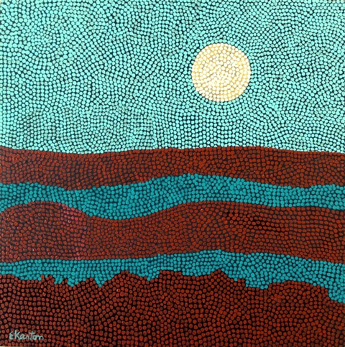

## Evaluación

Se evaluará de la siguiente manera:
- 0 puntos si no se presenta o si sólo se presenta el enunciado con modificaciones mínimas o si el ejercicio no resuelve el problema.
- 5 puntos si se presenta únicamente la resolución del ejercicio (en este caso un proceso que calcule el número de puntos), pero no se justifica los pasos realizados o no se comentan los resultados (comparación entre umbralizaciones, por ejemplo).
- 5-10 puntos, dependiendo de los comentarios realizados y de la profundidad de las explicaciones.

## Formato de entrega
- Se pide entregar el ejercicio de dos maneras:
-- En formato .py (con el código puro)
-- En formato .html

No se aceptará el formato .ipynb
Habilitaré una actividad en Canvas para que podáis subir ambos archivos.

# Inicialización

En primer lugar, cargamos todos los paquetes/frameworks que nos van a hacer falta. Se recomienda visitar la web: https://scikit-image.org/ para ver todas las funcionalidades que permite Scikit Image.

In [7]:
# Paquetes necesarios para la realización de esta práctica (no son necesarios conocerlos ni entenderlos por ahora)
from skimage.io import imread
from skimage import transform as tf

import matplotlib.pyplot as plt

# Cargamos la función para convertir de RGB a Escala de grises
from skimage.color import rgb2gray

In [2]:
# Paquete y funciones para realizar una umbralización con Scikit-image
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola


# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

# Estas dos funciones nos sirven para detectar los objetos dentro de una imagen binaria
from skimage.morphology import label
from skimage.measure import regionprops

In [11]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img, title):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(title)
    plt.show()

## Cargar la imagen

Lo primero de todo, vamos a leer la imagen. Recuerda que hay que subir la imagen cada vez que _inicies sesión_ en el notebook y que la ruta se mira haciendo botón derecho sobre el archivo.

Con lo cual, aquí vamos a hacer dos cosas:
- Cargar la imagen
- Convertirla a escala de grises

Hacemos esto para luego posteriormente umbralizar la imagen en escala de grises.

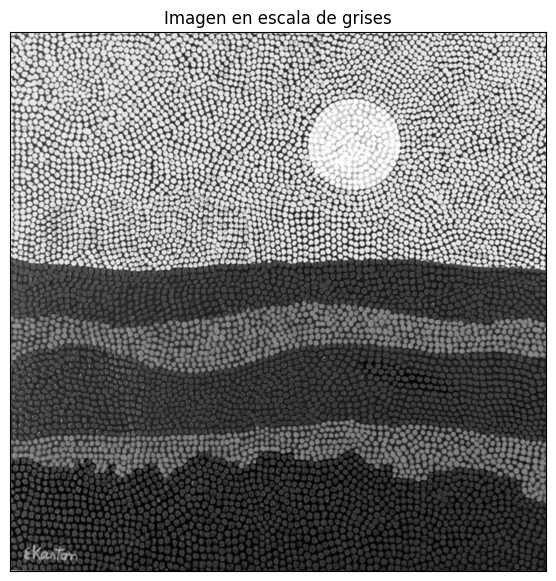

In [12]:
# Os tendría que ir quedando una cosa así

## Umbralizar la imagen con varios métodos

Vamos a probar ahora diferentes métodos para umbralizar la imagen. Se pide en esta actividad:
- Ejecutar cada método (para ello tendréis que ver en la documentación cómo invocarlo y qué parámetros necesita)
- Mostrar por pantalla el resultado de cada imagen, añadiendo una explicación de a qué corresponde cada imagen
- Hacer una comparación general de todos (es decir, cuál da mejores resultados, aspectos que observeis, etc...)
- Explicar a qué tipo corresponden los métodos de threshold_niblack y threshold_sauvola
- Por último, ¿se obtiene el mismo resultado si se rota la imagen 180º?¿Por qué?

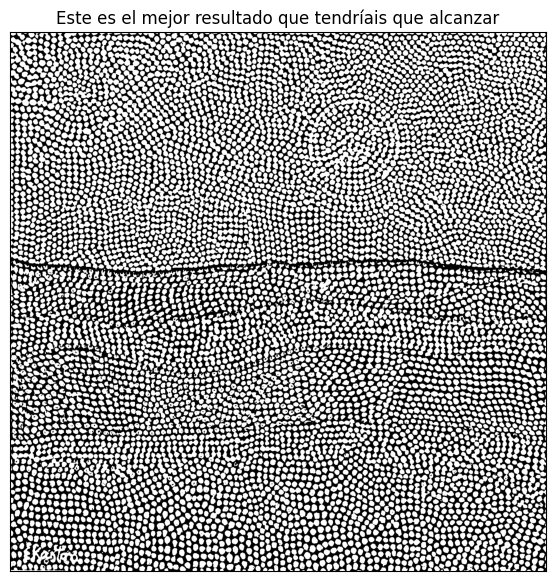

In [21]:
# Este es el mejor resultado que tendríais que alcanzar

# Morfología Matemática

Como se puede apreciar en la imagen hay varios elementos imperfectos:
- Hay círculos que están en contacto con otros círculos
- Hay círculos que están huecos por centro
- Hay círculos que no están cerrados del todo

Mediante el uso de morfología matemática (concretamente los cuatro operadores visto en clase) y los posibles elementos estructurales existentes, se pide:
- Decidir qué elemento estructural, y por qué, es el más adecuado. Indicar también el tamaño del elemento estructural que se ha decidido escoger.
- ¿Qué operador o secuencia de operadores elegiríais?
- Una vez elegido operador y elemento estructural, repetir este mismo proceso (es decir, elegir operador y elemento estructural), para la imagen _complementaria_, ¿qué conclusiones sacas de esto?


# Contando círculos

Haciendo uso de las funcionalidades cargadas al principio, se pide hacer una función que:
- Reciba como parámetro una imagen binaria
- Compruebe que es binaria y si no es binaria, deberá imprimir por pantalla que no es binaria
- Cuente el número de círculos dentro de la imagen.
- Devuelva (return) dicho número de círculos.

Por último, ¿qué se podría hacer para asegurar que no se tienen en cuenta posibles errores en la umbralización como pequeños puntos o posible ruido que haya llegado hasta este punto?

In [22]:
# Función para contar el número de círculos
def count_circles(imagen_binaria):
  # Haz cosas
  num_circulos = 'pongo esto solo para que veais cómo sería la estructura'
  return num_circulos

# (Bonus) Automatizamos el proceso de extracción

Esta sección no es obligatoria pero la pongo para aquellos que quieran saber "¿y ahora qué se haría?".

Lo que hemos hecho hasta ahora es:
- Encontrar un método de umbralización adecuado (que tiene unos parámetros que ya hemos fijado - según nuestro criterio)
- Hemos utilizado unos métodos de morfología matemática, también con sus parámetros

Es decir, tenemos varios parámetros y tenemos una función que nos dice cuál es el número de puntos dada una imagen. Variando dichos parámetros, variará también el número de puntos, pero no parece haber una relación directa.

También no hay que olvidar que desconocemos el número de puntos (nunca se ha dicho, aunque siempre puedes contarlos), por lo que no podemos seguir un proceso de aprendizaje supervisado (tipo descenso del gradiente sobre los parámetros anteriores para encontrar el mejor resultado).

Pero lo que sí podemos hacer es iterar el valor de los parámetros para alcanzar un máximo de puntos (asumiendo que dicho máximo corresponderá con el mejor resultado). Esto suele hacerse cuando no sabemos exáctamente el resultado que esperamos.

En definitiva, ahora se buscaría realizar un proceso iterativo para encontrar el valor máximo del número de puntos. Para ello haría falta:
- Crear una función que englobe todos los procesos anteriores (umbralización, morfología matemática, etc...) y que tome como parámetro de entrada una imagen en color y devuelva el número de puntos.
- Crear los intervalos donde variarán todos los parámetros que queremos ir modificando
- Crear un proceso iterativo que vaya recorriendo todas las combinaciones de elementos (se recomienda el uso de `product` del paquete `itertools`).
- Una vez terminado el proceso quedarnos con la combinación de paráteros ganadora y el resultado del número de puntos.

Podría decirse que esa combinación de parámetros es la mejor.
